In [1]:
import pandas as pd

# # Exercise 1: Dimension reduction with PCA

# 1. Load the data (above) in a DataFrame.


In [47]:
df= pd.read_csv("censusCrimeClean.csv")
df.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


# 2. Since PCA only works with numerical data, extract all the data except the first column (which is text) and store as a variable.


In [75]:
X = df.drop("communityname", axis=1)

# 3. Create and fit PCA with two components with these features
# 

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [78]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 

# 4. Look at the explained_variance_ratio_. How much of the variation are these two components capturing? Try standardising the variables and see what effect that has.Standardising scales the variables so they all have the same variance. This is usually recommended for PCA, because it ensure all variables considered with the same  weighing. But in our case, the variables are all percentages, so it may be less important. Comment on how much of the variation is captured into these two variables.


In [80]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.67387831, 0.08863102])

#They are capturing 76% variance.

scales= scale(X)

In [81]:
pca1 = PCA(n_components = 2) 
X_scaled = pca1.fit_transform(scales) 

In [82]:
explained_variance = pca1.explained_variance_ratio_
explained_variance

array([0.255184  , 0.16834087])

In [87]:
## They are capturing 41% variance.


## 5. Transform the samples into the principal components and plot them on a scatterplot. Each dot (sample) is a "community" (small geographical region). How does this look?


In [88]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['PC1','PC2']
X_scaled.head()

,PC1,PC2
0,-1.416746,-1.082723
1,1.683610,0.629899
2,2.215686,-2.371437
3,-3.003442,2.025376
4,-5.709826,-2.641262


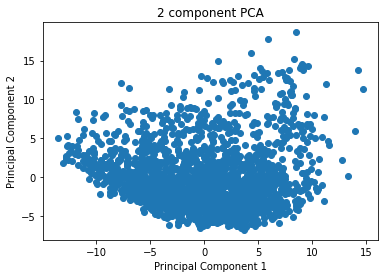

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.scatter(X_scaled['PC1'],X_scaled['PC2'])

# 6. Look at the loadings. The components_ attributes contains the loadings that give the contribution of each feature on the principal component (listed in the same order as the column order). I suggest you: ○ put them in a panda dataframe with the original column headings as the headings ○ transpose so that the rows are the features and the columns are the components ○ convert the values to absolute values (remove the sign, we don't need it) ○ sort by the (absolute) loadings in the first column


In [90]:
comp= pd.DataFrame(abs(pca.components_), columns= X.columns ).T
comp= comp.sort_values(by=list(comp.columns),axis=0)
comp

,0,1
racePctHisp,0.000002,0.064135
PctUsePubTrans,0.000037,0.036078
racePctAsian,0.000064,0.061561
racepctblack,0.000066,0.130905
PctForeignBorn,0.000076,0.024639
...,...,...
medIncome,0.003932,0.185649
RentHighQ,0.004078,0.188187
PctOccupManu,0.004403,0.132659
pctUrban,0.004944,0.146079


# 7. These will tell you which variables most strongly contribute. You will see that one massively dominates and this may help you interpret the scatterplot. Have a look at the variable. Why should be not be using it?



#fold variable is massively dominating.We can ignore it.

## 8. Repeat with this variable removed.

In [93]:
x= X.drop("fold", axis=1)

In [94]:
scales= scale(x)

pca2 = PCA(n_components = 2) 
x_scaled = pca2.fit_transform(scales) 

In [95]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.255184  , 0.16834087])

# 9. As an extra - plot the samples in the principal component space (like before). Colour the points by ViolentCrimesPerPop. In which principal components does this vary? Look at the loadings - which variables seem to relate to this? Note that this is not a great way to analyse this, just a by-product of what we have done.
# 

In [96]:
y= df['ViolentCrimesPerPop']
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns = ['PC1','PC2']
x_scaled.head()

,PC1,PC2
0,-1.416746,-1.082723
1,1.683610,0.629899
2,2.215686,-2.371437
3,-3.003442,2.025375
4,-5.709826,-2.641262


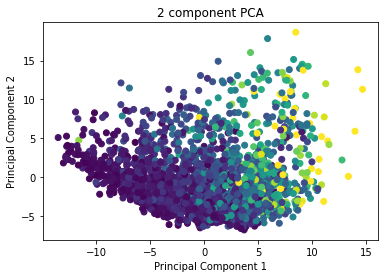

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.scatter(x_scaled['PC1'],x_scaled['PC2'], c=y)

In [98]:
comp= pd.DataFrame(abs(pca2.components_), columns= x.columns ).T
comp= comp.sort_values(by=list(comp.columns),axis=0)
comp


,0,1
pctWFarmSelf,0.002218,0.018688
PctForeignBorn,0.003104,0.212692
householdsize,0.008405,0.114260
PctWorkMomYoungKids,0.008584,0.067971
pctWRetire,0.011480,0.102528
...,...,...
PctPopUnderPov,0.172045,0.008442
pctWInvInc,0.173333,0.019798
PctKids2Par,0.174495,0.012338
medIncome,0.179410,0.068540


# # Exercise 2: Multidimensional scaling

In [100]:
# 1. Load the data from here.
df= pd.read_excel("london-borough-profilesv2.xlsx")
df

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8000,4.514371e+03,290.40,27.525868,41.303887,7.948036,77.541617,...,.,8.10,8.23,7.44,x,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,195600,7.326141e+04,3610.80,54.160527,33.228935,26.072939,63.835021,...,35.4,7.06,7.57,6.97,3.3,Lab,0,100,0,38.16
2,E09000003,Barnet,Outer London,370000,1.413858e+05,8674.80,42.651374,36.896246,20.886408,65.505593,...,14.7,7.35,7.79,7.27,2.63,Cons,50.793651,42.857143,1.587302,41.1
3,E09000004,Bexley,Outer London,236500,9.470123e+04,6058.10,39.044243,38.883039,20.282830,63.146450,...,25.8,7.47,7.75,7.21,3.22,Cons,71.428571,23.809524,0,not avail
4,E09000005,Brent,Outer London,320200,1.143186e+05,4323.30,74.063670,35.262694,20.462585,68.714872,...,19.6,7.23,7.32,7.09,3.33,Lab,9.52381,88.888889,1.587302,33
5,E09000006,Bromley,Outer London,317400,1.340127e+05,15013.50,21.137655,39.844502,19.648001,62.927051,...,24.2,7.63,7.80,7.36,3.2,Cons,85,11.666667,0,not avail
6,E09000007,Camden,Inner London,228400,1.008419e+05,2178.90,104.820985,35.842413,15.632617,73.313473,...,18.1,7.22,7.37,7.13,3.25,Lab,22.222222,74.074074,1.851852,38.69
7,E09000008,Croydon,Outer London,373100,1.500539e+05,8650.40,43.129707,36.570761,21.641888,65.638589,...,28.6,7.00,7.46,7.11,3.02,Lab,42.857143,57.142857,0,38
8,E09000009,Ealing,Outer London,344900,1.268610e+05,5554.40,62.089808,35.637099,20.642035,68.216689,...,22.4,7.24,7.48,7.44,3.58,Lab,17.391304,76.811594,5.797101,41.3
9,E09000010,Enfield,Outer London,322400,1.246020e+05,8083.20,39.888486,36.062871,22.182556,65.114934,...,26.4,7.18,7.57,7.41,2.51,Lab,34.920635,65.079365,0,37.79


In [101]:
londonBorough_feat = df.apply(pd.to_numeric, errors='coerce')
londonBorough_feat

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,8000,4.514371e+03,290.40,27.525868,41.303887,7.948036,77.541617,...,NaN,8.10,8.23,7.44,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,195600,7.326141e+04,3610.80,54.160527,33.228935,26.072939,63.835021,...,35.4,7.06,7.57,6.97,3.30,NaN,0.000000,100.000000,0.000000,38.16
2,NaN,NaN,NaN,370000,1.413858e+05,8674.80,42.651374,36.896246,20.886408,65.505593,...,14.7,7.35,7.79,7.27,2.63,NaN,50.793651,42.857143,1.587302,41.10
3,NaN,NaN,NaN,236500,9.470123e+04,6058.10,39.044243,38.883039,20.282830,63.146450,...,25.8,7.47,7.75,7.21,3.22,NaN,71.428571,23.809524,0.000000,NaN
4,NaN,NaN,NaN,320200,1.143186e+05,4323.30,74.063670,35.262694,20.462585,68.714872,...,19.6,7.23,7.32,7.09,3.33,NaN,9.523810,88.888889,1.587302,33.00
5,NaN,NaN,NaN,317400,1.340127e+05,15013.50,21.137655,39.844502,19.648001,62.927051,...,24.2,7.63,7.80,7.36,3.20,NaN,85.000000,11.666667,0.000000,NaN
6,NaN,NaN,NaN,228400,1.008419e+05,2178.90,104.820985,35.842413,15.632617,73.313473,...,18.1,7.22,7.37,7.13,3.25,NaN,22.222222,74.074074,1.851852,38.69
7,NaN,NaN,NaN,373100,1.500539e+05,8650.40,43.129707,36.570761,21.641888,65.638589,...,28.6,7.00,7.46,7.11,3.02,NaN,42.857143,57.142857,0.000000,38.00
8,NaN,NaN,NaN,344900,1.268610e+05,5554.40,62.089808,35.637099,20.642035,68.216689,...,22.4,7.24,7.48,7.44,3.58,NaN,17.391304,76.811594,5.797101,41.30
9,NaN,NaN,NaN,322400,1.246020e+05,8083.20,39.888486,36.062871,22.182556,65.114934,...,26.4,7.18,7.57,7.41,2.51,NaN,34.920635,65.079365,0.000000,37.79


# 2. londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all') Fill the NANs with the column mean and centralise them (subtract the column mean from each value)
# 

In [103]:
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')
londonBorough_feat=londonBorough_feat.fillna(londonBorough_feat.mean())



london_Borough= scale(londonBorough_feat, with_mean='True', with_std='False')
centered_df = pd.DataFrame(london_Borough, columns=londonBorough_feat.columns)
centered_df

,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013","Proportion of population aged 65 and over, 2013",% of resident population born abroad (2013),% of largest migrant population (2013),...,"Female life expectancy, (2010-12)",Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,-0.286238,-0.283153,-0.228023,-1.044601,2.243350,-3.997649,2.154184,0.889903,-6.450342e-16,0.000000,...,-2.933651e-14,0.000000,4.162831,3.690402,1.545082,3.309830e-15,0.000000,4.818826e-16,5.933122e-17,2.904071e-15
1,-0.271889,-0.270734,-0.227262,-0.337964,-1.193399,2.305251,-1.229225,-0.530076,1.011433e-01,0.279415,...,-1.843060e+00,1.642153,-1.178568,-0.070479,-1.623134,1.077674e-01,-1.344725,1.465590e+00,-4.371058e-01,-3.657080e-01
2,-0.258551,-0.258427,-0.226101,-0.643310,0.367431,0.501645,-0.816852,0.599901,1.070321e-01,-0.750394,...,7.374063e-01,-1.910045,0.310861,1.183148,0.399131,-2.389012e+00,0.738830,-4.720941e-01,-3.310724e-01,8.359041e-01
3,-0.268761,-0.266861,-0.226701,-0.739010,1.213022,0.291752,-1.399195,1.552076,-1.654484e+00,-0.769008,...,6.341877e-01,-0.005243,0.927176,0.955216,-0.005322,-1.903555e-01,1.585274,-1.117989e+00,-4.371058e-01,2.904071e-15
4,-0.262360,-0.263317,-0.227099,0.190082,-0.327818,0.354261,-0.024656,-0.295303,1.691429e+00,1.689454,...,7.374063e-01,-1.069187,-0.305454,-1.495055,-0.814228,2.195635e-01,-0.954058,1.088818e+00,-3.310724e-01,-2.474660e+00
5,-0.262574,-0.259759,-0.224648,-1.214085,1.622227,0.070991,-1.453353,1.826612,-1.706882e+00,-0.659632,...,7.374063e-01,-0.279810,1.748930,1.240131,1.005811,-2.648863e-01,2.141973,-1.529747e+00,-4.371058e-01,2.904071e-15
6,-0.269381,-0.265752,-0.227590,1.006097,-0.081086,-1.325351,1.110487,-0.220945,8.660055e-01,-0.254725,...,1.666374e+00,-1.326593,-0.356814,-1.210140,-0.544593,-7.855943e-02,-0.433170,5.864555e-01,-3.134002e-01,-1.490909e-01
7,-0.258314,-0.256861,-0.226107,-0.630620,0.228903,0.764362,-0.784022,0.314358,-1.739990e-01,-0.367005,...,-6.044364e-01,0.475247,-1.486725,-0.697292,-0.679410,-9.356629e-01,0.413274,1.232691e-02,-4.371058e-01,-4.311019e-01
8,-0.260471,-0.261051,-0.226817,-0.127594,-0.168470,0.416665,-0.147630,-0.192867,1.110995e+00,1.338920,...,4.277503e-01,-0.588696,-0.254095,-0.583326,1.545082,1.151198e+00,-0.631334,6.792834e-01,-4.985348e-02,9.176464e-01
9,-0.262191,-0.261459,-0.226237,-0.716612,0.012741,0.952378,-0.913284,0.308891,-2.126068e-01,-0.432181,...,2.213130e-01,0.097719,-0.562253,-0.070479,1.342855,-2.836197e+00,0.087719,2.814497e-01,-4.371058e-01,-5.169313e-01


# 3. distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)
# 


In [104]:
from sklearn.metrics import euclidean_distances
distMatrix = euclidean_distances(centered_df, centered_df)

# 4. Use scikit-learn's MDS function to perform MDS on the data and project the points to a lower-dimensional space (using MDS's fit_transform()). Here's is a (more complicated) example.
# 

In [105]:
from sklearn import manifold

In [106]:
mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    random_state=123,
    dissimilarity="precomputed",
    n_jobs=1,
)
pos = mds.fit(distMatrix).embedding_
nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=12,
    n_jobs=1,
    n_init=1,
)
npos = nmds.fit_transform(distMatrix, init=pos)

 ## 5. Visualise the data on a 2D scatterplot and annotate the points using the borough names using the annotate function in matplotlib.


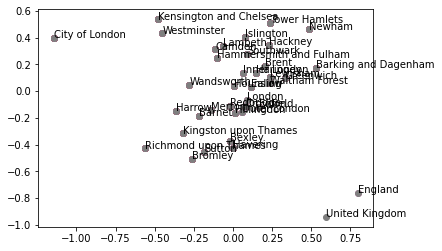

In [108]:
y=df['Area/INDICATOR']
x1=[]
x2=[]
for i in range(len(npos)):
    x1.append(npos[i][0])
    x2.append(npos[i][1])
    
    plt.scatter(x1, x2)
for i in range(len(x1)):
    plt.annotate(y[i], (x1[i], x2[i] + 0.001))
  





# Exercise 3: Group wines based on their characteristics

# ### 1. Load the data, extract and store the features to use (start will all except the first columns - the first column is the known classes that we won't be using), and extract and store the known labels.




In [110]:
df= pd.read_csv("wine.csv")
df_x= df.drop("Class label",axis=1)
df_y= df['Class label']


# 2. Use the k-means method to cluster the features into 3 clusters.


In [112]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_x)



pred= kmeans.labels_
pred



from sklearn.metrics import confusion_matrix


confusion_matrix(pred, df_y)

# 4. So, it is more effective to plot the wines in a scatterplot using a consistent layouts (try PCA or MDS) and colour the dots first by the known labels and then the cluster labels


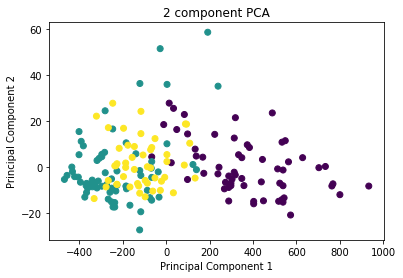

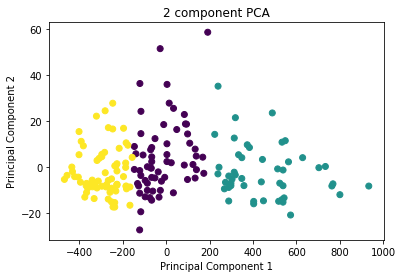

In [115]:
pca21 = PCA(n_components = 2) 
df_X_pca = pca.fit_transform(df_x) 



x_scaled = pd.DataFrame(df_X_pca)
x_scaled.columns = ['PC1','PC2']
x_scaled.head()


fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.scatter(x_scaled['PC1'],x_scaled['PC2'], c=df_y)


fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.scatter(x_scaled['PC1'],x_scaled['PC2'], c=pred)

# Exercise 4: Cross-validation

# ### Load the load (you already did in exercise 1) and identify your dependent and independent variable independent

In [116]:
df = pd.read_csv("censusCrimeClean.csv",usecols=["medIncome","ViolentCrimesPerPop"])
#X=df["medIncome"]
#y = df["ViolentCrimesPerPop"]
X = np.array(df["medIncome"]).reshape(-1, 1)
y = np.array(df["ViolentCrimesPerPop"]).reshape(-1, 1)


## 2. foldCount += 1

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import numpy as np

In [120]:
kf = KFold(n_splits=5)
regr = LinearRegression()
foldCount = 0

In [131]:
for train_idxs, test_idxs in kf.split(df):
    print("Run: ", foldCount)
    print(len(df),len(train_idxs),len(test_idxs))
    #put your code here
    X_train , X_test = X[train_idxs],X[test_idxs]
    
    y_train , y_test = y[train_idxs] , y[test_idxs]
    regr.fit(X_train,y_train)
    pred_values = regr.predict(X_test)

Run:  0
1994 1595 399
Run:  0
1994 1595 399
Run:  0
1994 1595 399
Run:  0
1994 1595 399
Run:  0
1994 1596 398


In [132]:
print(regr.coef_)

[[-0.47486011]]


## print(regr.score(independentSubsetUnseen, dependentSubsetUnseen))
   

In [135]:
foldCount += 1

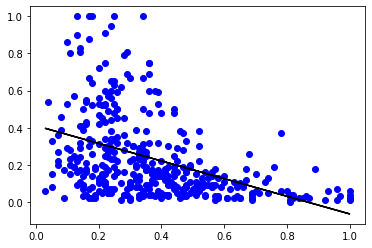

In [136]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, pred_values, color ='k')
  
plt.show()

In [137]:
# ### Report the residuals


res= y_test-pred_values
res

array([[ 0.01397126],
       [ 0.087044  ],
       [ 0.04799364],
       [-0.07926895],
       [-0.19524657],
       [ 0.1480496 ],
       [-0.11200636],
       [-0.04949237],
       [-0.31021859],
       [-0.23798398],
       [-0.18273258],
       [ 0.45000483],
       [-0.18122419],
       [-0.16574937],
       [ 0.60352442],
       [-0.17625216],
       [ 0.53676462],
       [-0.07574937],
       [ 0.11492089],
       [ 0.1239153 ],
       [-0.10128014],
       [ 0.06050763],
       [ 0.0796695 ],
       [ 0.01575903],
       [-0.23446439],
       [-0.05027455],
       [-0.07329133],
       [ 0.21251882],
       [ 0.03251882],
       [ 0.12352442],
       [ 0.03626182],
       [ 0.02218348],
       [ 0.13525623],
       [-0.27273258],
       [-0.30072139],
       [ 0.01844048],
       [ 0.03626182],
       [ 0.4412898 ],
       [-0.11027455],
       [-0.06826336],
       [ 0.55078701],
       [-0.11675496],
       [-0.06524657],
       [-0.16999517],
       [ 0.51201602],
       [-0